## Домашнее задание 2 | EDA


Датасет содержит следующие атрибуты:

1) id: Уникальный идентификатор объявления
2) name: Название объявления
3) host_id: Уникальный идентификатор хозяина
4) host_name: Имя хозяина
5) neighbourhood_group: Группа районов
6) neighbourhood: Название района
7) latitude: Широта местоположения жилья
8) longitude: Долгота местоположения жилья
9) room_type: Тип комнаты (например, "Отдельная комната" или "Жилье целиком")
10) price: Цена за ночь в евро
11) minimum_nights: Минимальное количество ночей, которое необходимо забронировать
12) number_of_reviews: Общее количество отзывов
13) last_review: Дата последнего отзыва
14) reviews_per_month: Среднее количество отзывов в месяц
15) calculated_host_listings_count: Общее количество объявлений хозяина
16) availability_365: Количество доступных дней для бронирования в течение следующих 365 дней
17) number_of_reviews_ltm: Количество отзывов за последние 12 месяцев. Показывает активность объекта размещения за последний год
18) licence: Номер лицензии объекта размещения. Указывает на наличие лицензии у хозяина для предоставления услуг сдачи жилья. Может содержать пропущенные значения, если лицензия не предоставлена  или не требуется

### Задание 1 (0.25 балла): Загрузка и чтение данных
1) Загрузите набор данных с сайта Inside Airbnb: http://insideairbnb.com/get-the-data.html. Выберите файл "listings.csv" для города, который Вам приглянулся. Для удобства проверки укажите в комментарии выбранный город.
2) Прочитайте данные и выведите первые 5 строк DataFrame, чтобы убедиться, что данные загружены и считаны правильно.

Критерии оценки:

* Успешная загрузка набора данных и его чтение в виде DataFrame.
* Предоставление вывода с первыми 5 строками, чтобы показать, что данные считаны правильно.

In [1]:
import pandas as pd
import numpy as np

# У меня друг живет в LA поэтому хочу выбрать его

d = pd.read_csv('listings.csv')
d.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,770565020594037590,Phillips Ranch room with a view,30603612,Yamileth,Other Cities,Pomona,34.031856,-117.777994,Private room,61,5,1,2022-12-26,0.42,5,27,1,NaN
1,777451666060243581,Family oriented home,490709958,Dana,Unincorporated Areas,Castaic Canyons,34.439250,-118.444090,Private room,399,3,0,NaN,NaN,1,87,0,NaN
2,698097753730921190,方便易居驿站,444692513,Hanna,Other Cities,Pomona,34.048480,-117.768870,Private room,46,3,5,2023-01-16,0.86,4,87,5,NaN
3,13063118,TERRANEA OCEANFRNT 1BR CASITA -203 RSRT AMENIT...,41736985,Beth,Other Cities,Rancho Palos Verdes,33.738420,-118.395800,Private room,408,3,53,2022-11-26,0.64,10,270,13,NaN
4,39337076,Brand New Duplex Near World Cruise Center,208375458,Jae,Other Cities,Rancho Palos Verdes,33.748420,-118.311000,Private room,80,2,44,2023-02-24,1.09,4,357,26,NaN


### Задание 2 (1.25 балла): Предобработка данных
Исследуйте пропущенные значения в наборе данных
1) Определите столбцы с большим количеством пропущенных значений.
2) Удалите дубликаты строк и обработайте все пропуски.
3) Преобразуйте типы данных при необходимости. Например, если столбец 'last_review' имеет тип данных object, преобразуйте его в формат datetime.
4) Выведите информацию о DataFrame для проверки успешного выполнения всех операций предварительной обработки.

Критерии оценки:
* Проведение анализа пропущенных значений и принятие решения о их обработке.
* Удаление дубликатов и корректное изменение типов данных при необходимости.
* Предоставление вывода о структуре и типах данных DataFrame после предварительной обработки.

In [2]:
# №1
a = d.isnull().sum() # определяю количество пропущенных значений в каждом столбце
a = a.sort_values(ascending=False) # сортирую столбцы с пропущенными значениями в порядке убывания
a[a > 0] # убираю те, у которых нет пропущенных значений

license              30509
reviews_per_month    11671
last_review          11671
host_name                2
name                     2
dtype: int64

In [3]:
d.shape
d[['license' , 'reviews_per_month', 'last_review', 'host_name', 'name']].head()

,license,reviews_per_month,last_review,host_name,name
0,NaN,0.42,2022-12-26,Yamileth,Phillips Ranch room with a view
1,NaN,NaN,NaN,Dana,Family oriented home
2,NaN,0.86,2023-01-16,Hanna,方便易居驿站
3,NaN,0.64,2022-11-26,Beth,TERRANEA OCEANFRNT 1BR CASITA -203 RSRT AMENIT...
4,NaN,1.09,2023-02-24,Jae,Brand New Duplex Near World Cruise Center


In [4]:
# Посмотрим какие значения принимают колонки где нет Nan, тк в датасете 42451 запись а максимум строчек с Nan 30509 мы можем это сделать
d[['license' , 'reviews_per_month', 'last_review', 'host_name', 'name']].dropna().head(5)

,license,reviews_per_month,last_review,host_name,name
5,STR21-0228,0.18,2018-07-30,Jeremy,Zuma Malibu Retreat
62,HSR22-002700,2.12,2023-03-05,Mario,Guesthouse in Los Ángeles
63,HSR22-003535,2.94,2023-02-23,Andrik,Luxurious Villa w/ Lap Pool Outdoor Kitchen
64,HSR19-004213,1.31,2020-08-23,Cynthia,"Private guesthouse CSUN, Studio City, Hollywood"
85,HSR21-001582,0.15,2021-10-03,Sean,Ocean/Mountain/Getty View. Walk to beach. Rare...


In [5]:
d[['license' , 'reviews_per_month', 'last_review', 'host_name', 'name']].dtypes 
# удостоверимся в типах данных у переменных в столбцах

license               object
reviews_per_month    float64
last_review           object
host_name             object
name                  object
dtype: object

In [6]:
# №2
d = d.drop_duplicates() # удалил все дубликаты строк
d.shape

# Замена всех пропущенных значений на заданное число или слово зависит от колонки (это легко сделать, тк мы ранее поняли какие значения принимают колонки где есть NA)

d['license'] = d['license'].fillna('unknown') # замена на слово "unknown"
d['reviews_per_month'] = d['reviews_per_month'].fillna(0) # замена на слово 0
d['last_review'] = d['last_review'].fillna('') # заменена на '', не могу на 'unknown', тк потом не смогу преобразовать в формат datetime
d['host_name'] = d['host_name'].fillna('unknown') # замена на слово "unknown"
d['name'] = d['name'].fillna('unknown') # замена на слово "unknown"

In [7]:
# №3
d.dtypes # посомтрим на все типы данных у переменных в столбцах


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [8]:
d.head() # посомтрим на сами переменные

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,770565020594037590,Phillips Ranch room with a view,30603612,Yamileth,Other Cities,Pomona,34.031856,-117.777994,Private room,61,5,1,2022-12-26,0.42,5,27,1,unknown
1,777451666060243581,Family oriented home,490709958,Dana,Unincorporated Areas,Castaic Canyons,34.439250,-118.444090,Private room,399,3,0,,0.00,1,87,0,unknown
2,698097753730921190,方便易居驿站,444692513,Hanna,Other Cities,Pomona,34.048480,-117.768870,Private room,46,3,5,2023-01-16,0.86,4,87,5,unknown
3,13063118,TERRANEA OCEANFRNT 1BR CASITA -203 RSRT AMENIT...,41736985,Beth,Other Cities,Rancho Palos Verdes,33.738420,-118.395800,Private room,408,3,53,2022-11-26,0.64,10,270,13,unknown
4,39337076,Brand New Duplex Near World Cruise Center,208375458,Jae,Other Cities,Rancho Palos Verdes,33.748420,-118.311000,Private room,80,2,44,2023-02-24,1.09,4,357,26,unknown


In [9]:
# преобразование типа данных

d['name'] = d['name'].astype(str)
d['host_name'] = d['host_name'].astype(str)
d['price'] = d['price'].astype(float)
d['last_review'] = pd.to_datetime(d['last_review'])

# проверяем внесенные изменения
d.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42451 entries, 0 to 42450
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              42451 non-null  int64         
 1   name                            42451 non-null  object        
 2   host_id                         42451 non-null  int64         
 3   host_name                       42451 non-null  object        
 4   neighbourhood_group             42451 non-null  object        
 5   neighbourhood                   42451 non-null  object        
 6   latitude                        42451 non-null  float64       
 7   longitude                       42451 non-null  float64       
 8   room_type                       42451 non-null  object        
 9   price                           42451 non-null  float64       
 10  minimum_nights                  42451 non-null  int64         
 11  nu

#### Вывод:
колонки 'license', 'reviews_per_month', 'last_review', 'host_name', 'name' имеют пропущенные значения в нашем датасете. Наибольшее из них у 'license'. Это может говорить о том, что у 30509 людей лицензия не предоставлена или не требуется. Я заменил все значения NaN в ней на 'unknown'. Также я изменил тип нескольких колонок, которые считаю необходимыми

### Задание 3 (1.25 балла): Исследование выбросов

1) Визуализируйте распределения числовых столбцов, таких как 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count' и 'availability_365', используя графики ящика с усами (boxplots) или гистограммы.
2) Используя визуализации, определите наличие выбросов в числовых столбцах и примите решение о том, как их обработать
3) После обработки выбросов визуализируйте распределения числовых столбцов снова, чтобы убедиться, что выбросы были успешно обработаны.

Критерии оценки:

* Визуализация распределений числовых столбцов для выявления выбросов.
* Принятие обоснованного решения о том, как обработать выбросы и успешное выполнение соответствующих операций.
* Предоставление графиков до и после обработки выбросов для демонстрации успешной обработки.

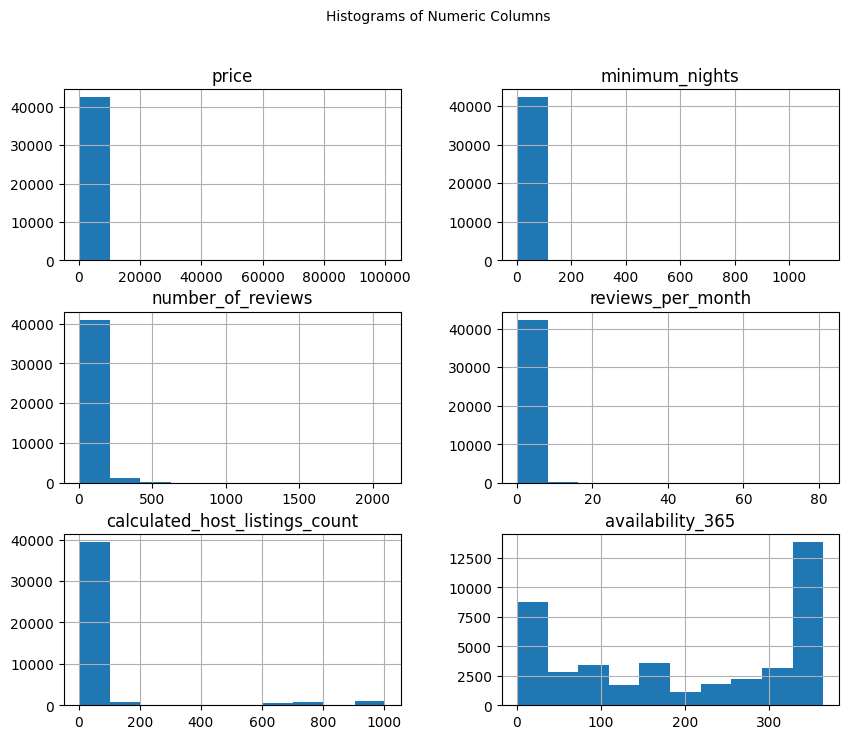

In [10]:
import matplotlib.pyplot as plt

# №1 визуализация распределений
d[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].hist(figsize=(10,8))
plt.suptitle('Histograms of Numeric Columns', fontsize=10)
plt.show()


+ 'price' распределенна в диапазоне от 0 до 10000, все что больше я удалю
+ 'minimum nights' уберу все значения выше 100
+ 'number of reviews' уберу значение выше 500
+ 'reviews per month' не буду трогать
+ 'calculated_host_listings_count' уберу все что свыше 800
+ 'availability_365' не буду трогать

In [11]:
d = d.loc[d['price'] <= 10000].reset_index(drop=True)
d = d.loc[d['minimum_nights'] <= 100].reset_index(drop=True)
d = d.loc[d['number_of_reviews'] <= 500].reset_index(drop=True)
d = d.loc[d['calculated_host_listings_count'] <= 800].reset_index(drop=True)

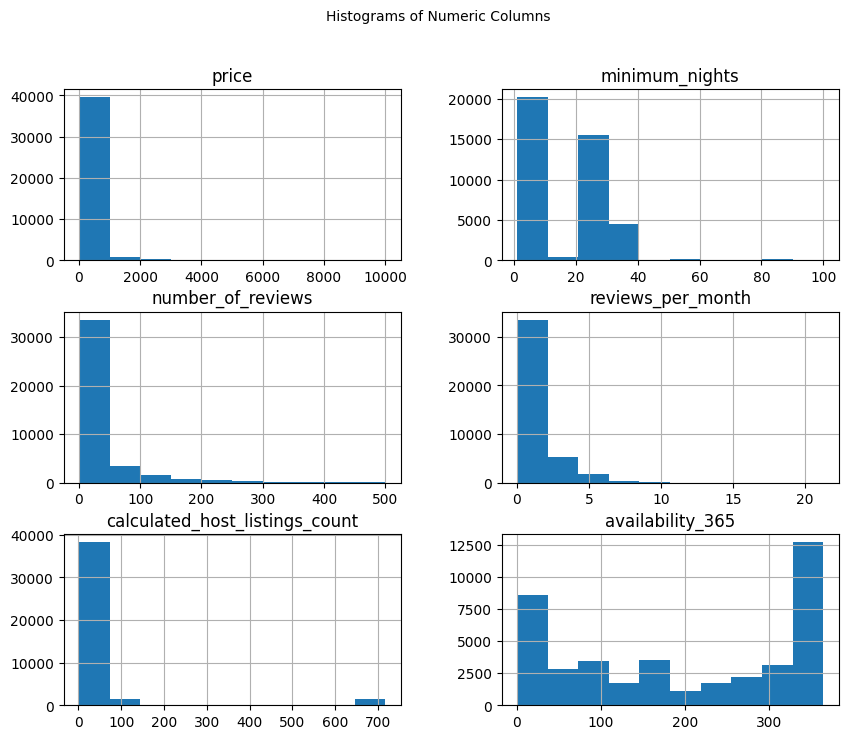

In [12]:
# №3 визуализация полученных графиков

d[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].hist(figsize=(10,8))
plt.suptitle('Histograms of Numeric Columns', fontsize=10)
plt.show()

#### Вывод
Удаление выбросов может улучшить качество моего анализа данных, но главное при этом не потерять важную информацию. Если удаление выбросов было обоснованным, как в моем случае, то это может привести к более точным результатам. Поэтому я удалил не все выбросы, а только аномально высокие показатели

### Задание 4 (1.75 балл): Создание новых признаков
1) Создайте признак 'distance_to_city_center_km', который вычисляет расстояние от каждого объекта размещения до центра города. В качестве координат центра используйте значения с сайта: https://batchgeo.com/map/latitude-longitude
2) Создайте новый признак "days_since_last_review" на основе столбца 'last_review'. Это может быть полезно для определения свежести отзывов и активности размещения.
3) Создайте новый признак "booking_rate" на основе столбцов 'availability_365' и 'number_of_reviews'. Это может быть полезно для определения популярности размещения.
4) Проведите анализ созданных признаков: исследуйте распределения
5) Выведите информацию о DataFrame и первые 5 строк, чтобы убедиться, что новые признаки были успешно созданы.

Критерии оценки:
* Создание новых признаков на основе существующих данных.
* Анализ распределения новых признаков.
* Предоставление вывода о структуре и типах данных DataFrame после создания новых признаков.

In [13]:
# №1
from geopy.distance import geodesic

c = (35, -120) # координаты центра LA

# Создание признака "distance_to_city_center_km"
d['distance_to_city_center_km'] = d.apply(lambda row: geodesic(c, (row['latitude'], row['longitude'])).km, axis=1)

# №2 Создание признака "days_since_last_review"
d['last_review'] = pd.to_datetime(d['last_review'])
d['days_since_last_review'] = (pd.to_datetime('today') - d['last_review']).dt.days

# №3 Создание признака "booking_rate"
d['booking_rate'] = d['number_of_reviews'] / d['availability_365']

# №4 Анализ созданных признаков (не очень понимаю, что подразумевается под словами "исследуйте распределения", пожтому просто вывел статистику для них)
d[['distance_to_city_center_km', 'days_since_last_review', 'booking_rate']].describe()


,distance_to_city_center_km,days_since_last_review,booking_rate
count,41024.000000,30360.000000,3.876800e+04
mean,187.339821,415.173518,inf
std,16.350201,594.865820,NaN
min,113.371306,60.000000,0.000000e+00
25%,179.049268,76.000000,3.095975e-03
50%,184.114657,130.000000,5.714286e-02
75%,194.925806,402.000000,5.208333e-01
max,240.462420,4100.000000,inf


In [14]:
# №5 Проверочка датафрейма
d.info()
d.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41024 entries, 0 to 41023
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              41024 non-null  int64         
 1   name                            41024 non-null  object        
 2   host_id                         41024 non-null  int64         
 3   host_name                       41024 non-null  object        
 4   neighbourhood_group             41024 non-null  object        
 5   neighbourhood                   41024 non-null  object        
 6   latitude                        41024 non-null  float64       
 7   longitude                       41024 non-null  float64       
 8   room_type                       41024 non-null  object        
 9   price                           41024 non-null  float64       
 10  minimum_nights                  41024 non-null  int64         
 11  nu

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,distance_to_city_center_km,days_since_last_review,booking_rate
0,770565020594037590,Phillips Ranch room with a view,30603612,Yamileth,Other Cities,Pomona,34.031856,-117.777994,Private room,61.0,...,1,2022-12-26,0.42,5,27,1,unknown,230.561420,132.0,0.037037
1,777451666060243581,Family oriented home,490709958,Dana,Unincorporated Areas,Castaic Canyons,34.439250,-118.444090,Private room,399.0,...,0,NaT,0.00,1,87,0,unknown,155.501029,NaN,0.000000
2,698097753730921190,方便易居驿站,444692513,Hanna,Other Cities,Pomona,34.048480,-117.768870,Private room,46.0,...,5,2023-01-16,0.86,4,87,5,unknown,230.434665,111.0,0.057471
3,13063118,TERRANEA OCEANFRNT 1BR CASITA -203 RSRT AMENIT...,41736985,Beth,Other Cities,Rancho Palos Verdes,33.738420,-118.395800,Private room,408.0,...,53,2022-11-26,0.64,10,270,13,unknown,203.361914,162.0,0.196296
4,39337076,Brand New Duplex Near World Cruise Center,208375458,Jae,Other Cities,Rancho Palos Verdes,33.748420,-118.311000,Private room,80.0,...,44,2023-02-24,1.09,4,357,26,unknown,208.342277,72.0,0.123249


### Вывод:
Данные признаки являются очень полезными и могут дать своего рода нужную информацию для клиентов, такую как: как рейтинг аренды жилища/комнаты зависит от расстояние до центра города; насколько правдивы отзывы и рейтинг аренды в зависимости от даты последнего отзыва и тд.

## Задание 5 (1.5 балла): Время статистики!
1) Рассчитайте описательные статистики для категориальных переменных. Опишите, какие выводы вы можете сделать из полученных данных.
2) Рассчитайте описательные статистики для числовых переменных. Опишите, какие выводы вы можете сделать из полученных данных для хотя бы трех признаков.
3) Выберите 3 интересующих вас числовых признака и рассчитайте релевантные описательные статистики для этих признаков, сгруппировав данные по категориальным переменным, таким как 'room_type', 'neighbourhood_group' или 'property_type'. Какие закономерности вы можете отметить? Как их можно проинтерпретировать?

Критерии оценки:

* Расчет описательных статистик для категориальных и числовых переменных и предоставление результатов.
* Описание выводов, которые можно сделать на основе описательных статистик.
* Выбор 3 числовых признаков и группировка данных по категориальным переменным для расчета описательных статистик. Описание закономерностей и их интерпретация.

In [15]:
# №1
# найдем категориальные переменные:
k = d.select_dtypes(include=['object']).columns
d[k].describe() # описательная статистика для них


,name,host_name,neighbourhood_group,neighbourhood,room_type,license
count,41024,41024,41024,41024,41024,41024
unique,38779,7836,3,265,4,6693
top,Private Designer Suite In A Mansion,Blueground,City of Los Angeles,Hollywood,Entire home/apt,unknown
freq,76,717,20999,1684,29182,30200


#### Вывод: 
Из статистики можно сказать следующее:
* В столбцах name и host_name есть дубликаты, так как значение unique меньше, чем значение count.
* Большинство объявлений (29182 из 41024) относятся к типу жилья "Entire home/apt".
* Большинство объявлений (20999 из 41024) относятся к группе районов "City of Los Angeles".
* В столбце neighbourhood_group всего три уникальных значения.
* В столбце room_type всего четыре уникальных значения.
* В столбце license большинство значений равно "unknown".

In [16]:
# №2
# найдем числовые переменные:
k = d.select_dtypes(include=['integer','float']).columns
d[k].describe() # описательная статистика для них

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,distance_to_city_center_km,days_since_last_review,booking_rate
count,4.102400e+04,4.102400e+04,41024.000000,41024.000000,41024.000000,41024.000000,41024.000000,41024.000000,41024.000000,41024.000000,41024.000000,41024.000000,30360.000000,3.876800e+04
mean,2.673369e+17,1.646137e+08,34.055539,-118.315932,268.918730,16.724625,31.734204,1.050298,33.907152,196.094579,8.527033,187.339821,415.173518,inf
std,3.489430e+17,1.614260e+08,0.137693,0.172025,561.344241,15.111278,63.863275,1.532332,124.624367,140.535639,16.354562,16.350201,594.865820,NaN
min,2.708000e+03,7.670000e+02,33.338480,-118.934830,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,113.371306,60.000000,0.000000e+00
25%,2.644655e+07,2.371988e+07,33.998646,-118.420603,89.000000,2.000000,0.000000,0.000000,1.000000,63.000000,0.000000,179.049268,76.000000,3.095975e-03
50%,4.907651e+07,1.063536e+08,34.062130,-118.345230,149.000000,20.000000,5.000000,0.330000,2.000000,195.000000,1.000000,184.114657,130.000000,5.714286e-02
75%,6.776863e+17,2.850240e+08,34.112073,-118.242998,250.000000,30.000000,31.000000,1.520000,10.000000,342.000000,8.000000,194.925806,402.000000,5.208333e-01
max,8.418548e+17,5.039739e+08,34.811130,-117.653400,10000.000000,100.000000,500.000000,21.280000,717.000000,365.000000,296.000000,240.462420,4100.000000,inf


#### Вывод:
1) Price:
* Средняя цена за ночь составляет 268.9 долларов, а максимальная цена - 10000 долларов.
* Стоимость ночлега для большинства объявлений находится в диапазоне от 89 до 250 долларов (25-75% квартили).
* Стандартное отклонение цены довольно высокое (561.3 долларов), что может указывать на большой разброс цен в выборке.

2) Number of reviews:
* Среднее количество отзывов на объявление составляет 31.7, а максимальное количество - 500.
* В выборке есть объявления без отзывов (минимальное количество отзывов равно 0).
* Количество отзывов для большинства объявлений находится в диапазоне от 0 до 31 (25-75% квартили).

3) Reviews per month:
* Среднее количество отзывов в месяц составляет 1.05, а максимальное количество - 21.28.
* Значение стандартного отклонения не определено (NaN), так как в столбце есть пропущенные значения.
* Для большинства объявлений количество отзывов в месяц находится в диапазоне от 0 до 1.52 (25-75% квартили).


In [17]:
# №3
# выбор трех числовых признаков
n = ['price', 'minimum_nights', 'number_of_reviews']

# группировка данных по категориальным переменным 'room_type' и 'neighbourhood_group'
d.groupby(['room_type', 'neighbourhood_group'])[n].describe()



price                                   
                                        count         mean          std   min   
room_type       neighbourhood_group                                             
Entire home/apt City of Los Angeles   15591.0   326.729844   574.280561  10.0  \
                Other Cities          11054.0   334.718202   637.161072   9.0   
                Unincorporated Areas   2537.0   299.769019   428.277726  19.0   
Hotel room      City of Los Angeles      23.0  1786.304348  3853.843706   0.0   
                Other Cities             57.0   192.824561   148.237517   0.0   
Private room    City of Los Angeles    4920.0   112.809959   399.283758  10.0   
                Other Cities           4900.0   145.215714   491.586177  10.0   
                Unincorporated Areas   1249.0    78.754203    67.951951  22.0   
Shared room     City of Los Angeles     465.0    73.602151   150.043926  11.0   
                Other Cities            190.0   128.384211   732.054119  11.0   
                Unincorporated Areas     38.0    51.263158    57.834659  21.0   

                                                                      
                                        25%    50%     75%      max   
room_type       neighbourhood_group                                   
Entire home/apt City of Los Angeles   116.0  175.0  300.00  10000.0  \
                Other Cities          135.0  189.0  295.00  10000.0   
                Unincorporated Areas  131.0  196.0  310.00   6250.0   
Hotel room      City of Los Angeles     0.0   50.0  226.00   9999.0   
                Other Cities          141.0  141.0  239.00    949.0   
Private room    City of Los Angeles    55.0   79.0   99.00  10000.0   
                Other Cities           54.0   72.0  106.00  10000.0   
                Unincorporated Areas   47.0   60.0   88.00   1143.0   
Shared room     City of Los Angeles    29.0   38.0   52.00   1300.0   
                Other Cities           30.0   35.0   69.75  10000.0   
                Unincorporated Areas   30.0   36.5   50.50    380.0   

                                     minimum_nights             ...          
                                              count       mean  ...    75%   
room_type       neighbourhood_group                             ...          
Entire home/apt City of Los Angeles         15591.0  22.941376  ...  30.00  \
                Other Cities                11054.0  11.095893  ...  30.00   
                Unincorporated Areas         2537.0   4.526606  ...   3.00   
Hotel room      City of Los Angeles            23.0  17.391304  ...  30.00   
                Other Cities                   57.0   1.105263  ...   1.00   
Private room    City of Los Angeles          4920.0  26.760772  ...  30.00   
                Other Cities                 4900.0   8.292857  ...   7.00   
                Unincorporated Areas         1249.0   5.167334  ...   3.00   
Shared room     City of Los Angeles           465.0  29.554839  ...  30.00   
                Other Cities                  190.0   6.110526  ...   3.00   
                Unincorporated Areas           38.0   4.605263  ...   2.75   

                                            number_of_reviews              
                                        max             count       mean   
room_type       neighbourhood_group                                        
Entire home/apt City of Los Angeles   100.0           15591.0  30.104355  \
                Other Cities          100.0           11054.0  35.523611   
                Unincorporated Areas   90.0            2537.0  46.859677   
Hotel room      City of Los Angeles    30.0              23.0  38.521739   
                Other Cities            7.0              57.0  37.175439   
Private room    City of Los Angeles   100.0            4920.0  22.984553   
                Other Cities          100.0            4900.0  33.260816   
                Unincorporated Areas   90.0            12

#### Вывод:
Из закономерностей можно отметить следующее:

* Средняя цена за аренду жилья в районах Лос-Анджелеса выше, чем в других городах.
* Для типа жилья "Отельный номер" в городе Лос-Анджелесе средняя цена значительно выше, чем в других городах.
* В районах Лос-Анджелеса больше всего доступно целых домов/квартир, а в других городах - отдельных комнат.
* В среднем, для аренды целого дома/квартиры требуется больше минимальных ночей, чем для аренды отдельной или общей комнаты.
* Количество отзывов на арендуемое жилье имеет различия в зависимости от типа жилья и района.

Интерпретация:
эти закономерности могут быть полезны для тех, кто планирует арендовать жилье в Лос-Анджелесе или других городах, так как они могут помочь определить, какой тип жилья и в каком районе будет наиболее подходящим для конкретных потребностей.

## Задание 6 (1 балл): Корреляции
1) Найдите три самых сильных линейных взаимосвязи.
2) Опишите, между какими признаками вы их нашли и содержательно проинтерпретируйте, почему (с вашей точки зрения) эти показатели связаны.
важно: необходимо вывести именно с помощью кода 3 пары самых сильно скоррелированных признака, а не искать их глазами в матрице корреляций

Критерии оценки:

* Расчет матрицы корреляций для числовых признаков и предоставление результатов.
* Отбор и вывод трех пар самых сильно скоррелированных признаков с использованием кода.
* Содержательная интерпретация найденных взаимосвязей между признаками.

In [18]:
d.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                    float64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
license                                   object
distance_to_city_center_km               float64
days_since_last_review                   float64
booking_rate        

In [19]:
# №1
# Расчет матрицы корреляций (направление неважно => модуль)
m = d.select_dtypes(include=['integer','float']).corr().abs()

# Отбор трех самых сильных линейных взаимосвязей
topcorr = m.unstack().sort_values(ascending=False).drop_duplicates()[:4].index
topcorr


MultiIndex([(               'id',                         'id'),
            (        'longitude', 'distance_to_city_center_km'),
            ('reviews_per_month',      'number_of_reviews_ltm'),
            ('number_of_reviews',      'number_of_reviews_ltm')],
           )

#### Вывод:
3 самые сильные линейные взаимосвязи:
1) (longitude, distance_to_city_center_km)

чем дальше от центра города находится объект размещения, тем больше его значение долготы (longitude). Это объясняется тем, что центр города обычно находится в центре координатной сетки, а объекты размещения расположены по периферии.

2) (reviews_per_month, number_of_reviews_ltm)

чем больше количество отзывов за последние 12 месяцев (number_of_reviews_ltm), тем выше среднее количество отзывов в месяц (reviews_per_month). Это связано с тем, что более активные объекты размещения будут иметь больше отзывов в целом, а следовательно, и большее среднее количество отзывов в месяц.

3) (number_of_reviews, number_of_reviews_ltm)

общее количество отзывов (number_of_reviews) будет влиять на количество отзывов за последние 12 месяцев (number_of_reviews_ltm), так как количество отзывов за последние 12 месяцев является частью общего количества отзывов. Следовательно, чем больше общее количество отзывов, тем больше количество отзывов за последние 12 месяцев.



Эти связи могут быть полезны для анализа данных и принятия решений в отношении объектов размещения. Например, зная долготу объекта размещения, можно оценить его удаленность от центра города и использовать эту информацию для принятия решений о ценообразовании. Также можно использовать информацию о количестве отзывов для оценки активности объекта размещения и его популярности среди гостей.

## Задание 7 (2 балла): Визуализации

1) Придумайте и постройте как минимум 6 содержательных визуализаций, которые будут иллюстрировать те или иные выводы, которые вы сделали на основе данных.

2) К каждой визуализации должна прилагаться содержательная текстовая интерпретация.

3) Каждая визуализация должна быть грамотно оформлена, с соблюдением всем правил (названия, подписи осей, легенды и т. д.). Необходимо задействовать не менее 4 типов диаграмм.

Критерии оценки:

* Создание 6 содержательных визуализаций с использованием не менее 4 разных типов диаграмм.
* Грамотное оформление визуализаций, с соблюдением всех правил.
* Содержательная текстовая интерпретация для каждой визуализации, объясняющая выводы на основе графика.

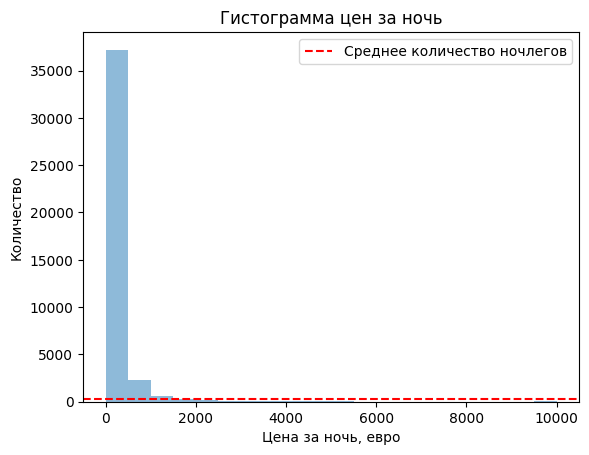

In [38]:
# Строим гистограмму цен за ночь
plt.hist(d['price'], bins=20, alpha=0.5)
plt.xlabel('Цена за ночь, евро')
plt.ylabel('Количество')
plt.title('Гистограмма цен за ночь')
plt.axhline(y = d['price'].mean(), color='r', linestyle='--', label='Среднее количество ночлегов') # линия показывает среднее значение
plt.legend()
plt.show()


Из данной гистограммы можно сделать вывод, что в большая часть всех предлагаемых ночлегов за ночь стоят довльно дешево чем остальные. Также видно, что очень мало дорогостоящих ночлегов в LA, это может говорить об уровне экономики и количеству безработицы жителей в городе

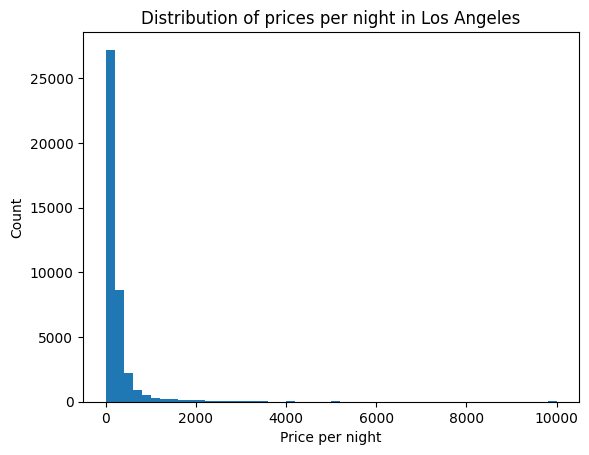

In [22]:
# построение гистограммы цен за ночь
plt.hist(d['price'], bins=50)
plt.xlabel('Price per night')
plt.ylabel('Count')
plt.title('Distribution of prices per night in Los Angeles')
plt.show()


Интерпретация: Гистограмма показывает распределение цен за ночь в Лос-Анджелесе. Большинство объявлений имеют цену до 500 долларов за ночь, но есть также несколько объявлений с ценами более 1000 долларов за ночь.

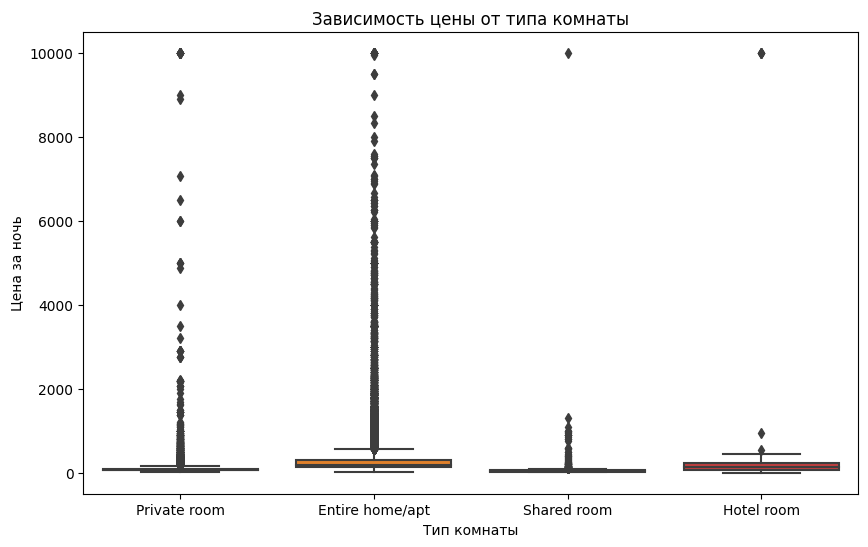

In [33]:
# Визуализация зависимости цены от типа комнаты
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(x='room_type', y='price', data=d)
plt.title('Зависимость цены от типа комнаты')
plt.xlabel('Тип комнаты')
plt.ylabel('Цена за ночь')
plt.show()


На этой диаграмме размаха мы можем увидеть, что цены на жилье целиком значительно выше, чем на отдельные комнаты или комнаты в общежитии. Это может быть связано с тем, что жилье целиком предоставляет больше приватности и удобств, чем отдельные комнаты.

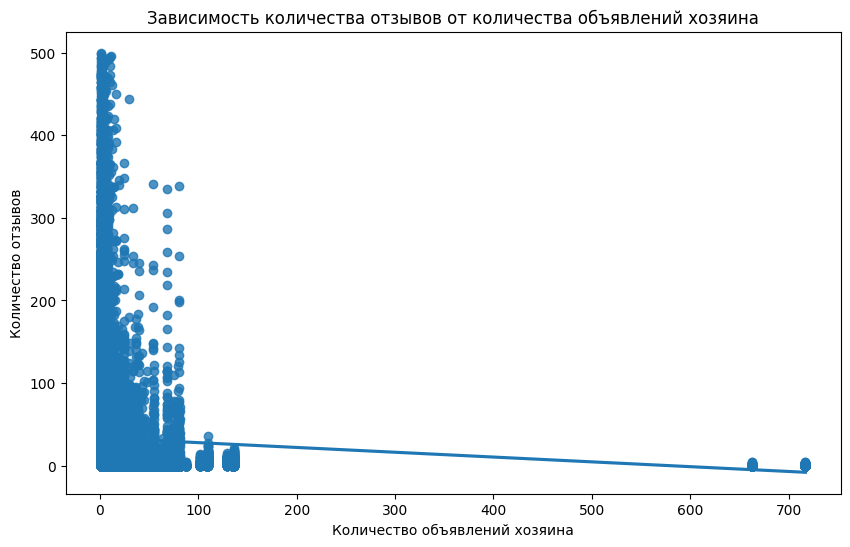

In [34]:
# Визуализация зависимости количества отзывов от количества объявлений хозяина
plt.figure(figsize=(10,6))
sns.regplot(x='calculated_host_listings_count', y='number_of_reviews', data=d)
plt.title('Зависимость количества отзывов от количества объявлений хозяина')
plt.xlabel('Количество объявлений хозяина')
plt.ylabel('Количество отзывов')
plt.show()

На этой гистограмме мы можем увидеть, что большинство объявлений имеют относительно небольшое количество отзывов, но есть также несколько объявлений с очень высоким количеством отзывов. Это может указывать на то, что эти объявления предлагают жилье, которое чрезвычайно популярно среди гостей.

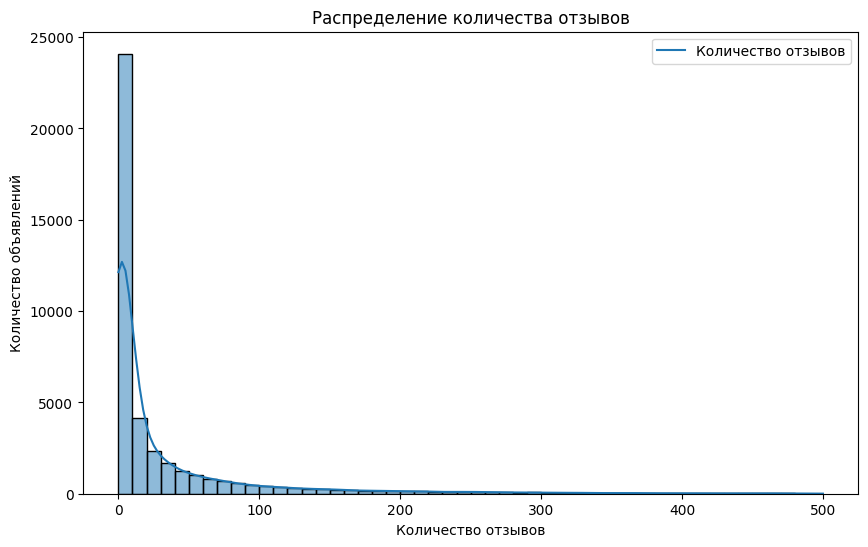

In [39]:
# Визуализация распределения количества отзывов
plt.figure(figsize=(10,6))
sns.histplot(d.number_of_reviews, bins=50, kde=True)
plt.title('Распределение количества отзывов')
plt.xlabel('Количество отзывов')
plt.ylabel('Количество объявлений')
plt.legend(['Количество отзывов'])
plt.show()

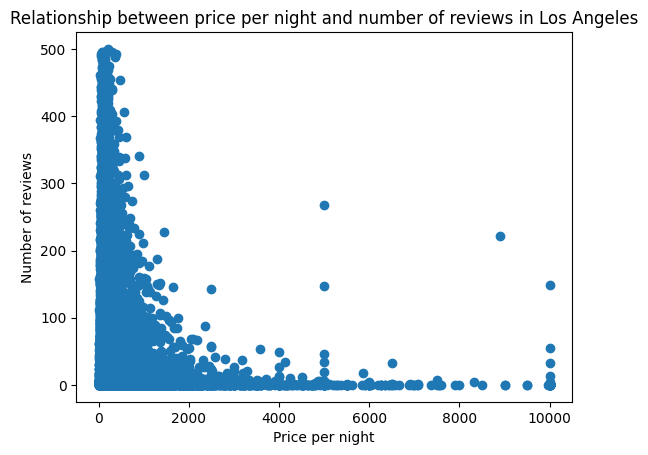

In [26]:
# построение диаграммы рассеяния цены за ночь и количества отзывов
plt.scatter(d['price'], d['number_of_reviews'])
plt.xlabel('Price per night')
plt.ylabel('Number of reviews')
plt.title('Relationship between price per night and number of reviews in Los Angeles')
plt.show()


Диаграмма рассеяния показывает связь между ценой за ночь и количеством отзывов. На графике можно заметить, что большинство объектов размещения имеют цены до 500 долларов за ночь и количество отзывов менее 200. Однако, есть также несколько объектов размещения с очень высокими ценами и большим количеством отзывов, что может указывать на то, что эти объекты размещения являются особенно популярными среди туристов.

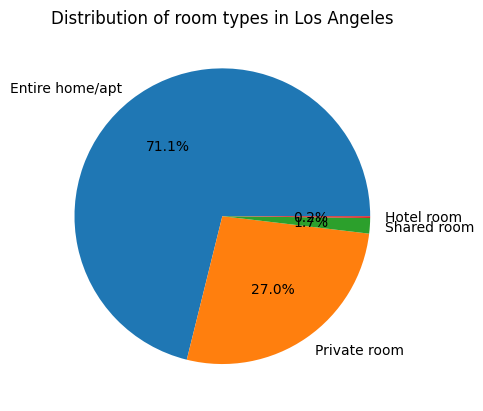

In [27]:
# построение круговой диаграммы типов комнат
room_types = d['room_type'].value_counts()
plt.pie(room_types, labels=room_types.index, autopct='%1.1f%%')
plt.title('Distribution of room types in Los Angeles')
plt.show()


Круговая диаграмма показывает распределение типов комнат в Лос-Анджелесе. Большинство объектов размещения предлагают жилье целиком (71,1%), в то время как отдельные комнаты (27,0%) и комнаты в общежитиях (1.9%) менее распространены.

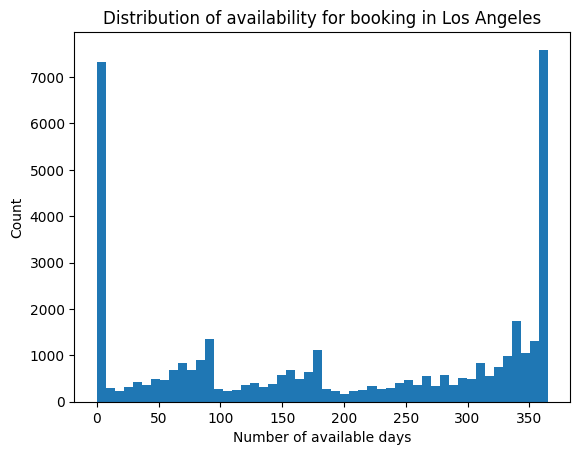

In [29]:
# построение гистограммы количества доступных дней для бронирования
plt.hist(d['availability_365'], bins=50)
plt.xlabel('Number of available days')
plt.ylabel('Count')
plt.title('Distribution of availability for booking in Los Angeles')
plt.show()


Гистограмма показывает распределение количества дней в году, которые доступны для бронирования объектов размещения в Лос-Анджелесе. Большинство объектов размещения доступны для бронирования более чем на 200 дней в году, но есть также несколько объектов размещения, которые доступны для бронирования менее чем на 50 дней в году.

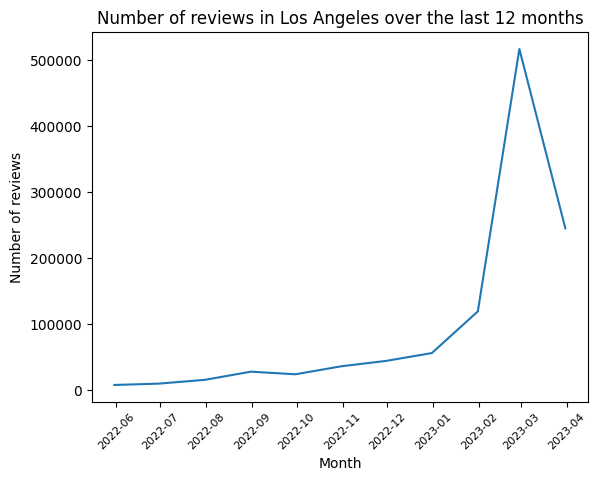

In [40]:
# построение линейного графика количества отзывов за последние 12 месяцев
d['last_review'] = pd.to_datetime(d['last_review'])
d = d.sort_values(by='last_review')
df_last_year = d[d['last_review'] >= pd.to_datetime('today') - pd.DateOffset(months=12)]
reviews_by_month = df_last_year.groupby(pd.Grouper(key='last_review', freq='M'))['number_of_reviews'].sum()
plt.plot(reviews_by_month)
plt.xlabel('Month')
plt.ylabel('Number of reviews')
plt.title('Number of reviews in Los Angeles over the last 12 months')
plt.xticks(rotation=45, fontsize=8)
plt.show()


Линейный график показывает, как меняется количество отзывов за последние 12 месяцев. Мы можем заметить, что количество отзывов достигло пика в марте 2023 года , а затем начало снижаться в апреле и мае. Это может быть связано с тем, что в это время была более высокая активность туристов в Лос-Анджелесе.

## Задание 8 (1 балл): Немного исследований
1) Исследуйте данные, используя различные методы анализа и визуализации, чтобы найти какую-нибудь интересную особенность. Это может быть связь между двумя переменными, неожиданный паттерн или что-то еще.
2) Проанализируйте и визуализируйте найденную особенность. Используйте различные методы визуализации, если это необходимо.
3) Предложите объяснение, почему такая особенность существует. Это может быть ваше предположение или результат анализа.

Критерии оценки:

* Найдена интересная особенность в данных.
* Выполнены расчеты и предоставлены визуализации, подтверждающие найденную особенность.
* Предложено объяснение

Предположим, я обнаружил интересный факт: в LA большинство людей снимают жилье целиком тк цена за ночь так дешевле, чем за комнату

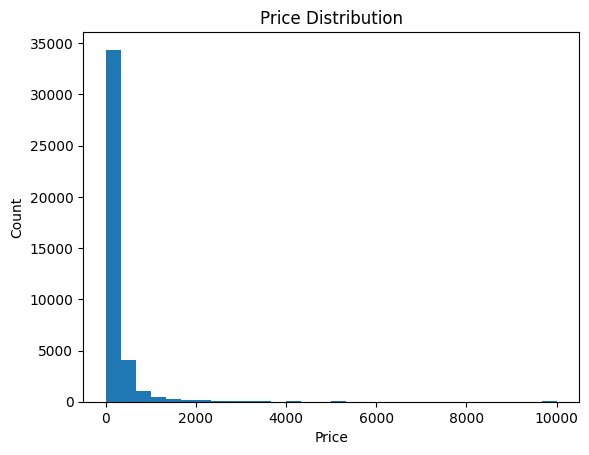

In [41]:
# для начала чекнем распределение цен за ночь в евро. Для этого мы можем использовать гистограмму:
# Вывод гистограммы цен за ночь в евро
plt.hist(d['price'], bins=30)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price Distribution')
plt.show()

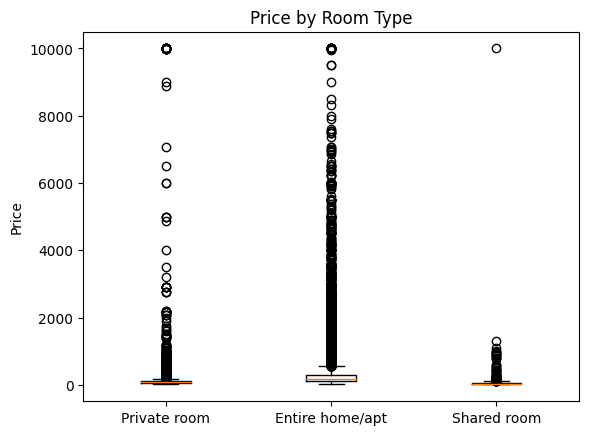

In [42]:
#  Нуууу так-с использую эту гистограмму, чтобы увидеть, как распределены цены по нашим данным.
#  Далее, чекну связь между ценой и типом комнаты. Для этого я использую ящик с усами:
# Вывод box plot для цены по типу комнаты

plt.boxplot([d[d['room_type'] == 'Private room']['price'], 
             d[d['room_type'] == 'Entire home/apt']['price'], 
             d[d['room_type'] == 'Shared room']['price']])
plt.xticks([1, 2, 3], ['Private room', 'Entire home/apt', 'Shared room'])
plt.ylabel('Price')
plt.title('Price by Room Type')
plt.show()


Остановимся на цене за ночь, тк мне кажется она намного интересеней, хотя и тип комнаты и цены за них нам тоже помогут в анализе. Сейчас я рассчитаю среднее значение цены за ночь в евро и количество доступных дней для бронирования в течение следующих 365 дней для всех объектов размещения. Также я рассчитаю корреляцию между двумя переменными, чтобы увидеть, есть ли между ними связь.


Для выполнения расчетов в качестве инструмента для анализа (как сказано в задании) я использовал различные методы библиотеки Pandas. Например, для расчета среднего значения метод mean(), а для расчета корреляции - метод corr().

In [46]:
# Расчет среднего значения цены за ночь в евро
mean = d['price'].mean()

# Расчет количества доступных дней для бронирования в течение следующих 365 дней
count = d['availability_365'].sum()

# Расчет корреляции между ценой и количеством отзывов
corr = d['price'].corr(d['number_of_reviews'])

mean, count, corr

(268.91873049922, 8044584, -0.06424893047230754)

ВЫВОД: По расчетам видно, что корреляция близка к 0, а это значит что связи между данными переменными нет. А учитывая график распределния типов жилья и соответсвующих цен, а также средней цене за аренду ночлега могу сказать, что самым дорогим и распространенным в LA является аренда жилья целиком, что противоречит моему предположению. УВЫ, Я ОШИБСЯ В ПРЕПОЛОЖЕНИИ((((

## Бонус (0.1 балла):
Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ:

![eto ya](https://risovach.ru/upload/2013/03/mem/uporotaya-lisa_13443657_orig_.jpeg)